# Project 1 Data Analysis & Visulization

* Histogram of top 5/10 most frequent hashtags Sooahn Lee, music Rachel Xu, author Brooke Bao (for each test scenario) Feb 14, 2024 night
* Correlation between likes, shares, comments, saves etc. (for each test scenario) → See slides for details/inspiration [This should be a scatter plot] Adelle Wang Lillie Godinez Feb 14, 2024 night
* How average values of the 4 variables change over time (save correlation for later)
* Jaccard Index for the hashtags for each video compared to the original hashtag list over time → Line plot (for each test scenario) Jia Yuan Hu


In [ ]:
#Import Libraries Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import urllib
import requests

In [ ]:
def list_files_in_repo(owner, repo, path='', branch='master'):
    api_url = f"https://api.github.com/repos/{owner}/{repo}/contents/{path}?ref={branch}"
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an exception for any errors

    contents = response.json()
    files = []
    for item in contents:
        if 'type' in item and item['type'] == 'file':
            files.append(item['name'])
        elif 'type' in item and item['type'] == 'dir':
            files.extend(list_files_in_repo(owner, repo, item['path'], branch))

    return files

# Example usage:
owner = 'lillgodi'  # Replace with the GitHub username or organization
repo = 'CS315-project1-group3'  # Replace with the repository name
branch = 'main'  # Replace with the branch name if needed
path = 'data'  # Optional: path within the repository, leave empty for the root directory
files = list_files_in_repo(owner, repo, path, branch)
print(files)

['-1_Sec01Gr3Cntrl_AH_02-12-16-55_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-12-16-55_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-14-19-20_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-14-19-20_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-15-23-45_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-15-23-45_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-15-23-52_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-15-23-52_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-00_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-00_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-06_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-06_like_by_hashtag_data_liked_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-12_like_by_hashtag_data_all_videos.csv', '-1_Sec01Gr3Cntrl_AH_02-16-00-12_like_by_hashtag_data_liked_vide

In [ ]:
people = ['AH','LG','AW','RX','BB','SL']
rawpath = 'https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/'

def makeAllDF(person,condition,files,rawpath,filetype):
  df = pd.DataFrame()

  for f in files:
    if person in f and condition in f and filetype in f:
      this = pd.read_csv(rawpath+f)
      df = pd.concat([df, this])

      #print(f)

  return df

In [ ]:
#count num files
def count(person,condition,files,rawpath,filetype):
  df = pd.DataFrame()
  l = []
  for f in files:
    if person in f and condition in f and filetype in f:
      l.append(f)
  return len(l)

for i in ['Cntrl','Activ']:
  for p in ['AH','RX','LG','BB','AW','SL']:
    print(p,i,count(p,i,files,rawpath,'all_videos'))

AH Cntrl 10
RX Cntrl 10
LG Cntrl 10
BB Cntrl 10
AW Cntrl 10
SL Cntrl 10
AH Activ 10
RX Activ 10
LG Activ 10
BB Activ 9
AW Activ 10
SL Activ 10


In [ ]:
amy_control = makeAllDF('AH','Cntrl',files,rawpath,'all_videos')
amy_active = makeAllDF('AH','Activ',files,rawpath,'all_videos')

lillie_control = makeAllDF('LG','Cntrl',files,rawpath,'all_videos')
lillie_active = makeAllDF('LG','Activ',files,rawpath,'all_videos')

brooke_control = makeAllDF('BB','Cntrl',files,rawpath,'all_videos')
brooke_active = makeAllDF('BB','Activ',files,rawpath,'all_videos')

rachel_control = makeAllDF('RX','Cntrl',files,rawpath,'all_videos')
rachel_active = makeAllDF('RX','Activ',files,rawpath,'all_videos')

adelle_control = makeAllDF('AW','Cntrl',files,rawpath,'all_videos')
adelle_active = makeAllDF('AW','Activ',files,rawpath,'all_videos')

soo_control = makeAllDF('SL','Cntrl',files,rawpath,'all_videos')
soo_active = makeAllDF('SL','Activ',files,rawpath,'all_videos')

In [ ]:
l = [amy_control, amy_active, lillie_control, lillie_active, brooke_control, brooke_active, rachel_control, rachel_active, adelle_control, adelle_active,soo_control,soo_active]
for i in l:
  print(len(i))

1077
1016
1063
1088
754
266
1033
1152
782
1100
1170
881


In [ ]:
# #Amy's TikTok All Video Data
# amy_control_1 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_AH_02-12-16-55_like_by_hashtag_data_all_videos.csv')
# amy_active_1 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/1_Sec01Gr3Sc1Activ_AH_02-12-16-56_like_by_control_data_all_videos.csv')
# amy_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_AH_02-14-19-20_like_by_hashtag_data_all_videos.csv')
# amy_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/1_Sec01Gr3Sc1Activ_AH_02-14-19-20_like_by_control_data_all_videos.csv')
# amy_active = pd.concat([amy_active_1, amy_active_2], ignore_index=True, sort=False)
# amy_control = pd.concat([amy_control_1, amy_control_2], ignore_index=True, sort=False)
# amy_active.head()

In [ ]:
# #Adelle's TikTok All Video Data
# adelle_control_1 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_AW_02-12-16-40_like_by_hashtag_data_all_videos.csv')
# adelle_active_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/5_Sec01Gr3Sc5Activ_AW_02-12-16-46_like_by_control_data_all_videos.csv')
# adelle_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_AW_02-14-19-45_like_by_hashtag_data_all_videos.csv')
# adelle_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/5_Sec01Gr3Sc5Activ_AW_02-14-19-46_like_by_control_data_all_videos.csv')
# adelle_active = pd.concat([adelle_active_1, adelle_active_2], ignore_index=True, sort=False)
# adelle_control = pd.concat([adelle_control_1, adelle_control_2], ignore_index=True, sort=False)
# adelle_active.head()

In [ ]:
# #Brooke's TikTok All Video Data
# brooke_control_1 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_BB_02-13-10-51_like_by_hashtag_data_all_videos.csv')
# brooke_active_1 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/6_Sec01Gr3Sc6Activ_BB_02-13-10-52_like_by_control_data_all_videos.csv')
# brooke_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_BB_02-13-11-00_like_by_hashtag_data_all_videos.csv')
# brooke_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/6_Sec01Gr3Sc6Activ_BB_02-13-10-59_like_by_control_data_all_videos.csv')
# brooke_active = pd.concat([brooke_active_1, brooke_active_2], ignore_index=True, sort=False)
# brooke_control = pd.concat([brooke_control_1, brooke_control_2], ignore_index=True, sort=False)
# brooke_active.head()

In [ ]:
# #Lillie's TikTok All Video Data
# lillie_control_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/-1_Sec01Gr3Cntrl_LG_02-12-17-04_like_by_hashtag_data_all_videos.csv')
# lillie_active_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/3_Sec01Gr3Sc3Activ_LG_02-12-17-05_like_by_control_data_all_videos.csv')
# lillie_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_LG_02-14-19-32_like_by_hashtag_data_all_videos.csv')
# lillie_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/3_Sec01Gr3Sc3Activ_LG_02-14-19-33_like_by_control_data_all_videos.csv')
# lillie_active = pd.concat([lillie_active_1, lillie_active_2], ignore_index=True, sort=False)
# lillie_control = pd.concat([lillie_control_1, lillie_control_2], ignore_index=True, sort=False)
# lillie_active.head()

In [ ]:
# #Rachel's TikTok All Video Data
# rachel_control_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/-1_Sec01Gr3Cntrl_RX_02-13-12-25_like_by_hashtag_data_all_videos.csv')
# rachel_active_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/2_Sec01Gr3Sc2Activ_RX_02-13-12-24_like_by_control_data_all_videos.csv')
# rachel_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_RX_02-14-19-28_like_by_hashtag_data_all_videos.csv')
# rachel_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/2_Sec01Gr3Sc2Activ_RX_02-14-19-27_like_by_control_data_all_videos.csv')
# rachel_active = pd.concat([rachel_active_1, rachel_active_2], ignore_index=True, sort=False)
# rachel_control = pd.concat([rachel_control_1, rachel_control_2], ignore_index=True, sort=False)
# rachel_active.head()

In [ ]:
# #Soo's TikTok All Video Data
# soo_control_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/-1_Sec01Gr3Cntrl_SL_02-13-11-08_like_by_hashtag_data_all_videos.csv')
# soo_active_1 = pd.read_csv('https://github.com/lillgodi/CS315-project1-group3/raw/main/data/4_Sec01Gr3Sc4Activ_SL_02-13-11-07_like_by_control_data_all_videos.csv')
# soo_control_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/-1_Sec01Gr3Cntrl_SL_02-14-19-37_like_by_hashtag_data_all_videos.csv')
# soo_active_2 = pd.read_csv('https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/4_Sec01Gr3Sc4Activ_SL_02-14-19-38_like_by_control_data_all_videos.csv')
# soo_active = pd.concat([soo_active_1, soo_active_2], ignore_index=True, sort=False)
# soo_control = pd.concat([soo_control_1, soo_control_2], ignore_index=True, sort=False)
# soo_control
# soo_active.head()

In [ ]:
# Liked TikTok Video Data


In [ ]:
##START OF AMY TASKS#

In [ ]:
amy_hashtags =['minecraft', 'gaming', 'gamer', "ps", 'playstation', 'videogames', 'game', 'xbox', 'games', 'twitch', 'fortnite', 'pc', 'memes', 'pcgaming', 'gamers', 'gamingcommunity', 'youtube', 'xboxone', 'gamergirl', 'nintendo', 'gta', 'callofduty', 'streamer', 'pubg', 'videogame', 'esports', 'bhfyp', 'meme', 'twitchstreamer', 'fortnitefunny', 'fortnitechapter5', 'gamingontiktok', 'gamelancer', 'pcgamer', 'pcgamer', 'diabloiv', 'gamingontiktok', 'epicgames', 'leaguetok', 'gamingmemes', 'minecraftclips', 'videogames', 'rocketleague', 'valorant', 'genshinimpact', 'warzone', 'gta5', 'roblox']
rachel_hashtags = ["kpop", "dance", "dancechallenge", "jenniesolo", "publicdance", "DanceTrends", "DanceTutorial", "DanceFitness", "KpopDance", "KpopChallenge", "KpopCover", "KpopMoves", "KpopChoreo", "KpopIdol", "KpopDanceTutorial", "KpopFancam", "KpopChoreography", "BTS", "EXO", "BLACKPINK", "blackpink", "TWICE", "RedVelvet", "NCT", "MAMAMOO", "ITZY", "SEVENTEEN","EVERGLOW", "BIGBANG", "SHINee"]
lillie_hashtags = ["Foodlover", "foodie", "foodtiktok", "cooking", "eating", "yummy", "delicious", "mukbang", "eat", "recipe", "tiktokfood", 'cooking', 'baking', 'garlic', 'steak','castiron', 'stainlesssteel', 'foodtiktok', 'food', 'foodvideo', 'foodie', 'chicken','recipe', 'easyrecipe', 'easyrecipes', 'asmrfood', 'italianfood', 'mexicanfood', 'asianfood', 'ramen', 'noodles', 'dinner', 'lunch', 'breakfast', 'dinnerideas', 'homecooking', 'comfortfood', 'recipesoftiktok', 'potato', 'pasta', 'chef', 'tastetest']
soo_hashtags = ["makeuptutorial", "makeup", "beauty", "makeupartist", "makeuphacks", "tutorial", "eyeliner", "makeuptransformation", "grwn", "mua", "skincare", "makeuproutine", "makeupchallenge", "makeup", "beauty", "launch", "newproduct", "grwm", "blush", "foundation", "sephora", "ultabeauty", "skincare", "hairstyle", "hairproducts", "concealer", "brushes", "lipstick", "bronzer", "contour", "mascara", "unboxing", "hair", "highlighter", "makeuptutorial", "lipgloss", "dyson", "gitter", "cosmetics", "makeupaddict", "beautyhacks", "beautycommunity", "makeupoftheday", "hairtutorial", "hairgoals"]
adelle_hashtags = ['sports', 'sport', 'baseball', 'basketball', 'football', 'mlb', 'nba', 'nfl', 'nhl', 'hockey', 'olympics', 'gymnastics', 'track', 'trackandfield', 'superbowl', 'fitness', 'training', 'gym', 'workout', 'motivation', 'athlete', 'exercise', 'boxing', 'mma', 'nike', 'team', 'sportswear', 'sportsnews', 'sportscenter', 'sportsbetting', 'fifa', 'soccer']
brooke_hashtags = ["Dance", "dancer", "music", "dancechallenge", "dancetutorial", "dancers", "lyric", "song", "spotify", "applemusic","art", "painting", "mural", "drawing", "artist", "digitalart", "sketchbook", "sketching", "pinterest", "illustration", "artjournal", "acrylic", "stilllife", "colorpencils", "animation", "artreel", "sketchingdaily", "artdaily", "artistic", "artwork", "artoftheday", "gouache", "oilpainting", "artgallery", "procreate", "prints", "ballpointpen", "mixedmedia"]

In [ ]:
# Jaccard Similarity
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [ ]:
def get_jaccard_scores(exp_hashtags, persona_hashtags):
  hashtag_jaccard = []
  for i in range(exp_hashtags.shape[0]):
    if pd.isna(exp_hashtags.iloc[i]['hashtag']) == False:
      if '%' in exp_hashtags.iloc[i]['hashtag']: #parse unicode characters
        li_experiment = urllib.parse.unquote(exp_hashtags.iloc[i]['hashtag']).replace(" ","").split(",")
      else:
        li_experiment = exp_hashtags.iloc[i]['hashtag'].replace(" ","").split(",")
      #print(li_experiment)
      hashtag_jaccard.append(jaccard(li_experiment, persona_hashtags))
  return hashtag_jaccard


In [ ]:
# Amy
amy_active_hashtag_jaccard = get_jaccard_scores(amy_active, amy_hashtags)
amy_control_hashtag_jaccard = get_jaccard_scores(amy_control, amy_hashtags)
# Rachel
rachel_active_hashtag_jaccard = get_jaccard_scores(rachel_active, rachel_hashtags)
rachel_control_hashtag_jaccard = get_jaccard_scores(rachel_control, rachel_hashtags)
# Lillie
lillie_active_hashtag_jaccard = get_jaccard_scores(lillie_active, lillie_hashtags)
lillie_control_hashtag_jaccard = get_jaccard_scores(lillie_control, lillie_hashtags)
# Soo
soo_active_hashtag_jaccard = get_jaccard_scores(soo_active, soo_hashtags)
soo_control_hashtag_jaccard = get_jaccard_scores(soo_control, soo_hashtags)
# Adelle
adelle_active_hashtag_jaccard = get_jaccard_scores(adelle_active, adelle_hashtags)
adelle_control_hashtag_jaccard = get_jaccard_scores(adelle_control, adelle_hashtags)
# Brooke
brooke_active_hashtag_jaccard = get_jaccard_scores(brooke_active, brooke_hashtags)
brooke_control_hashtag_jaccard = get_jaccard_scores(brooke_control, brooke_hashtags)

In [ ]:
def jaccard_line_plot(active_jaccard_scores, control_jaccard_scores, persona):
  x_active = np.arange(start=1, stop=len(active_jaccard_scores)+1)
  x_control = np.arange(start=1, stop=len(control_jaccard_scores)+1)
  plt.plot(x_active, active_jaccard_scores, linewidth=3.0)
  plt.plot(x_control, control_jaccard_scores, linewidth=2.0)
  plt.title(persona)
  plt.legend(['Active', 'Control'])
  plt.xlabel("Time (Index)")
  plt.ylabel("Jaccard Index")
  #calculate equation for trendline
  z = np.polyfit(x_active, active_jaccard_scores, 1)
  p = np.poly1d(z)

  #add trendline to plot
  plt.plot(x_active, p(x_active))
  plt.show()
  #plt.plot(range(len(jaccard_scores)), jaccard_scores)

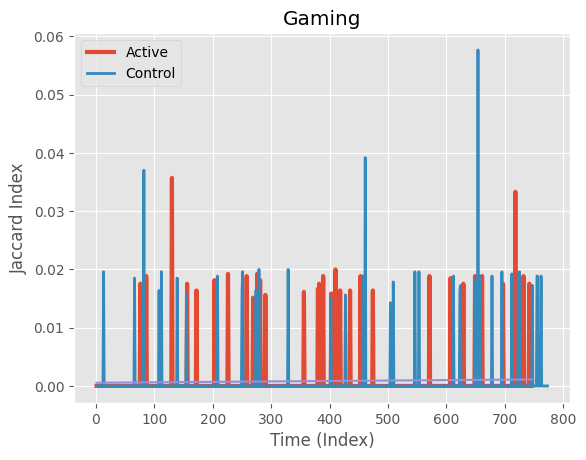

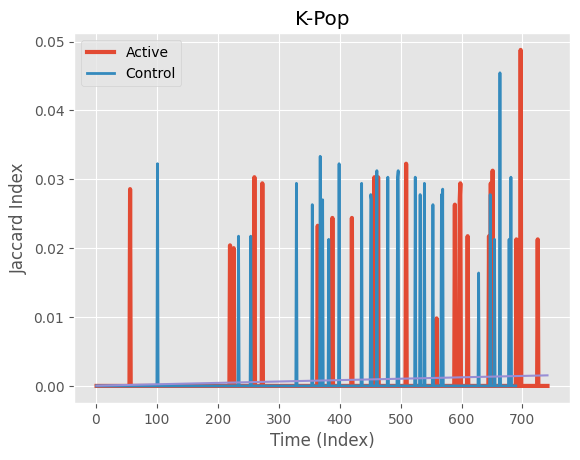

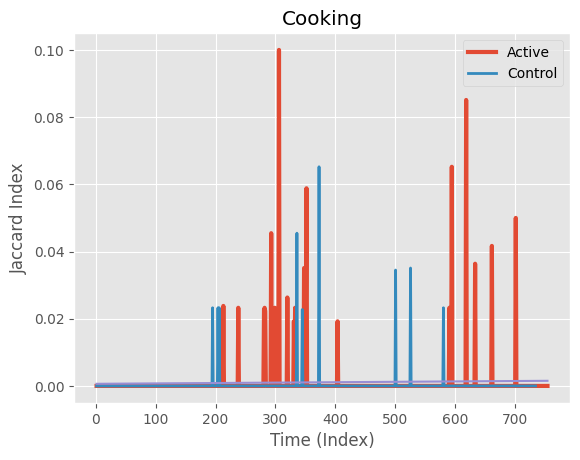

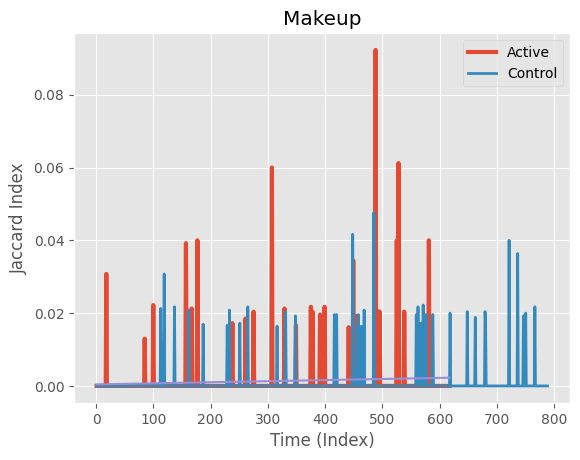

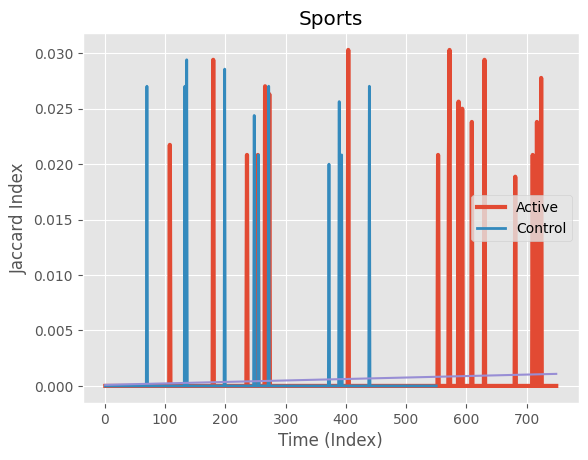

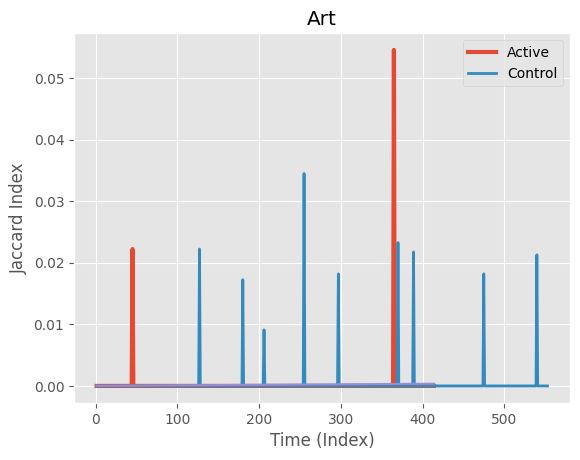

In [ ]:
  plt.style.use('ggplot')
  jaccard_line_plot(amy_active_hashtag_jaccard, amy_control_hashtag_jaccard, "Gaming")
  jaccard_line_plot(rachel_active_hashtag_jaccard, rachel_control_hashtag_jaccard, "K-Pop")
  jaccard_line_plot(lillie_active_hashtag_jaccard, lillie_control_hashtag_jaccard, "Cooking")
  jaccard_line_plot(soo_active_hashtag_jaccard, soo_control_hashtag_jaccard, "Makeup")
  jaccard_line_plot(adelle_active_hashtag_jaccard, adelle_control_hashtag_jaccard, "Sports")
  jaccard_line_plot(brooke_active_hashtag_jaccard, brooke_control_hashtag_jaccard, "Art")


In [ ]:
##END OF AMY TASKS##

In [ ]:
##START OF SOO TASKS##

In [ ]:
def parse_hashtags(control_data):
    c_hashtags = control_data['hashtag']
    #print(c_hashtags)
    clean_hashtag = c_hashtags[pd.isna(c_hashtags) == False] #cleaned data, has no NAs
    for i in range(len(clean_hashtag)):
      if '%' in str(clean_hashtag.iloc[i]): #parse unicode characters
        clean_hashtag.iloc[i] = urllib.parse.unquote(clean_hashtag.iloc[i])
        #print(clean_hashtag.iloc[i]) #parsing complete
    return clean_hashtag

#soo_control['hashtag'].isna().head () #33 missing values

In [ ]:
#referred from tutorial
allHashtagsCnt = Counter() # global variable that will be changed through the helper function

def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        allHashtagsCnt.update(htList) # method update of Counter takes a list and updates all keys

In [ ]:
# Amy
amy_c_hashtag = parse_hashtags(amy_control)
_ = amy_c_hashtag.apply(countAllHashtags)
amy_c_rank = allHashtagsCnt.most_common(20)
print(amy_c_rank)

allHashtagsCnt = Counter() #reset Counter

amy_a_hashtag = parse_hashtags(amy_active)
_ = amy_a_hashtag.apply(countAllHashtags)
amy_a_rank = allHashtagsCnt.most_common(20)
print(amy_a_rank)

# Adelle
adelle_c_hashtag = parse_hashtags(adelle_control)
_ = adelle_c_hashtag.apply(countAllHashtags)
adelle_c_rank = allHashtagsCnt.most_common(20)
print(adelle_c_rank)

allHashtagsCnt = Counter() #reset Counter

adelle_a_hashtag = parse_hashtags(adelle_active)
_ = adelle_a_hashtag.apply(countAllHashtags)
adelle_a_rank = allHashtagsCnt.most_common(20)
print(adelle_a_rank)

# Brooke
brooke_c_hashtag = parse_hashtags(brooke_control)
_ = brooke_c_hashtag.apply(countAllHashtags)
brooke_c_rank = allHashtagsCnt.most_common(20)
print(brooke_c_rank)

allHashtagsCnt = Counter() #reset Counter

brooke_a_hashtag = parse_hashtags(brooke_active)
_ = brooke_a_hashtag.apply(countAllHashtags)
brooke_a_rank = allHashtagsCnt.most_common(20)
print(brooke_a_rank)

# Lillie
lillie_c_hashtag = parse_hashtags(lillie_control)
_ = lillie_c_hashtag.apply(countAllHashtags)
lillie_c_rank = allHashtagsCnt.most_common(20)
print(lillie_c_rank)

allHashtagsCnt = Counter() #reset Counter

lillie_a_hashtag = parse_hashtags(lillie_active)
_ = lillie_a_hashtag.apply(countAllHashtags)
lillie_a_rank = allHashtagsCnt.most_common(20)
print(lillie_a_rank)

# Rachel
rachel_c_hashtag = parse_hashtags(rachel_control)
_ = rachel_c_hashtag.apply(countAllHashtags)
rachel_c_rank = allHashtagsCnt.most_common(20)
print(rachel_c_rank)

allHashtagsCnt = Counter() #reset Counter

rachel_a_hashtag = parse_hashtags(rachel_active)
_ = rachel_a_hashtag.apply(countAllHashtags)
rachel_a_rank = allHashtagsCnt.most_common(20)
print(rachel_a_rank)

# Soo
soo_c_hashtag = parse_hashtags(soo_control)
_ = soo_c_hashtag.apply(countAllHashtags)
soo_c_rank = allHashtagsCnt.most_common(20)
print(soo_c_rank)

allHashtagsCnt = Counter() #reset Counter

soo_a_hashtag = parse_hashtags(soo_active)
_ = soo_a_hashtag.apply(countAllHashtags)
soo_a_rank = allHashtagsCnt.most_common(20)
print(soo_a_rank)

In [ ]:
# # Amy
# plt.figure()
# plt.bar(*zip(*amy_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (Gaming) - Amy Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*amy_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (Gaming) - Amy Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# # Adelle
# plt.figure()
# plt.bar(*zip(*adelle_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (Sports) - Adelle Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*adelle_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (Sports) - Adelle Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# # Brooke
# plt.figure()
# plt.bar(*zip(*brooke_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (Art) - Brooke Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*brooke_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (Art) - Brooke Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# # Lillie
# plt.figure()
# plt.bar(*zip(*lillie_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (Food) - Lillie Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*lillie_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (Food) - Lillie Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# # Rachel
# plt.figure()
# plt.bar(*zip(*rachel_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (KPop) - Rachel Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*rachel_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (KPop) - Rachel Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# # Soo
# plt.figure()
# plt.bar(*zip(*soo_c_rank))
# plt.title('Top 20 Most Frequent Hashtags (Makeup) - Soo Control')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.figure()
# plt.bar(*zip(*soo_a_rank))
# plt.title('Top 20 Most Frequent Hashtags (Makeup) - Soo Active')
# plt.xlabel('Hashtags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)

# plt.show()

# #soo_c_rank.plot(kind='hist', color='blue')

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona) in enumerate(zip([amy_c_rank, adelle_c_rank, brooke_c_rank, lillie_c_rank, rachel_c_rank, soo_c_rank],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'], ['Gaming', 'Sports', 'Art', 'Food', 'KPop', 'Makeup'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} Control')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona) in enumerate(zip([amy_a_rank, adelle_a_rank, brooke_a_rank, lillie_a_rank, rachel_a_rank, soo_a_rank],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'], ['Gaming', 'Sports', 'Art', 'Food', 'KPop', 'Makeup'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} Active')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()


In [ ]:
##END OF SOO TASKS##

In [ ]:
## START OF RACHEL TASKS

In [ ]:
# 6 graphs for control data
# Amy music
amy_music = amy_control['music']
amy_music = amy_music.dropna()
amy_counts = amy_music.value_counts()
amy_music_top = amy_counts.head(10)
amy_music_top

# Adelle music
ad_music = adelle_control['music']
ad_music = ad_music.dropna()
ad_counts = ad_music.value_counts()
ad_music_top = ad_counts.head(10)

# Brooke music
b_music = brooke_control['music']
b_music = b_music.dropna()
b_counts = b_music.value_counts()
b_music_top = b_counts.head(10)

# Lillie music
l_music = lillie_control['music']
l_music = l_music.dropna()
l_counts = l_music.value_counts()
l_music_top = l_counts.head(10)

# Rachel music
r_music = rachel_control['music']
r_music = r_music.dropna()
r_counts = r_music.value_counts()
r_music_top = r_counts.head(10)

# Soo music
s_music = soo_control['music']
s_music = s_music.dropna()
s_counts = s_music.value_counts()
s_music_top = s_counts.head(10)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


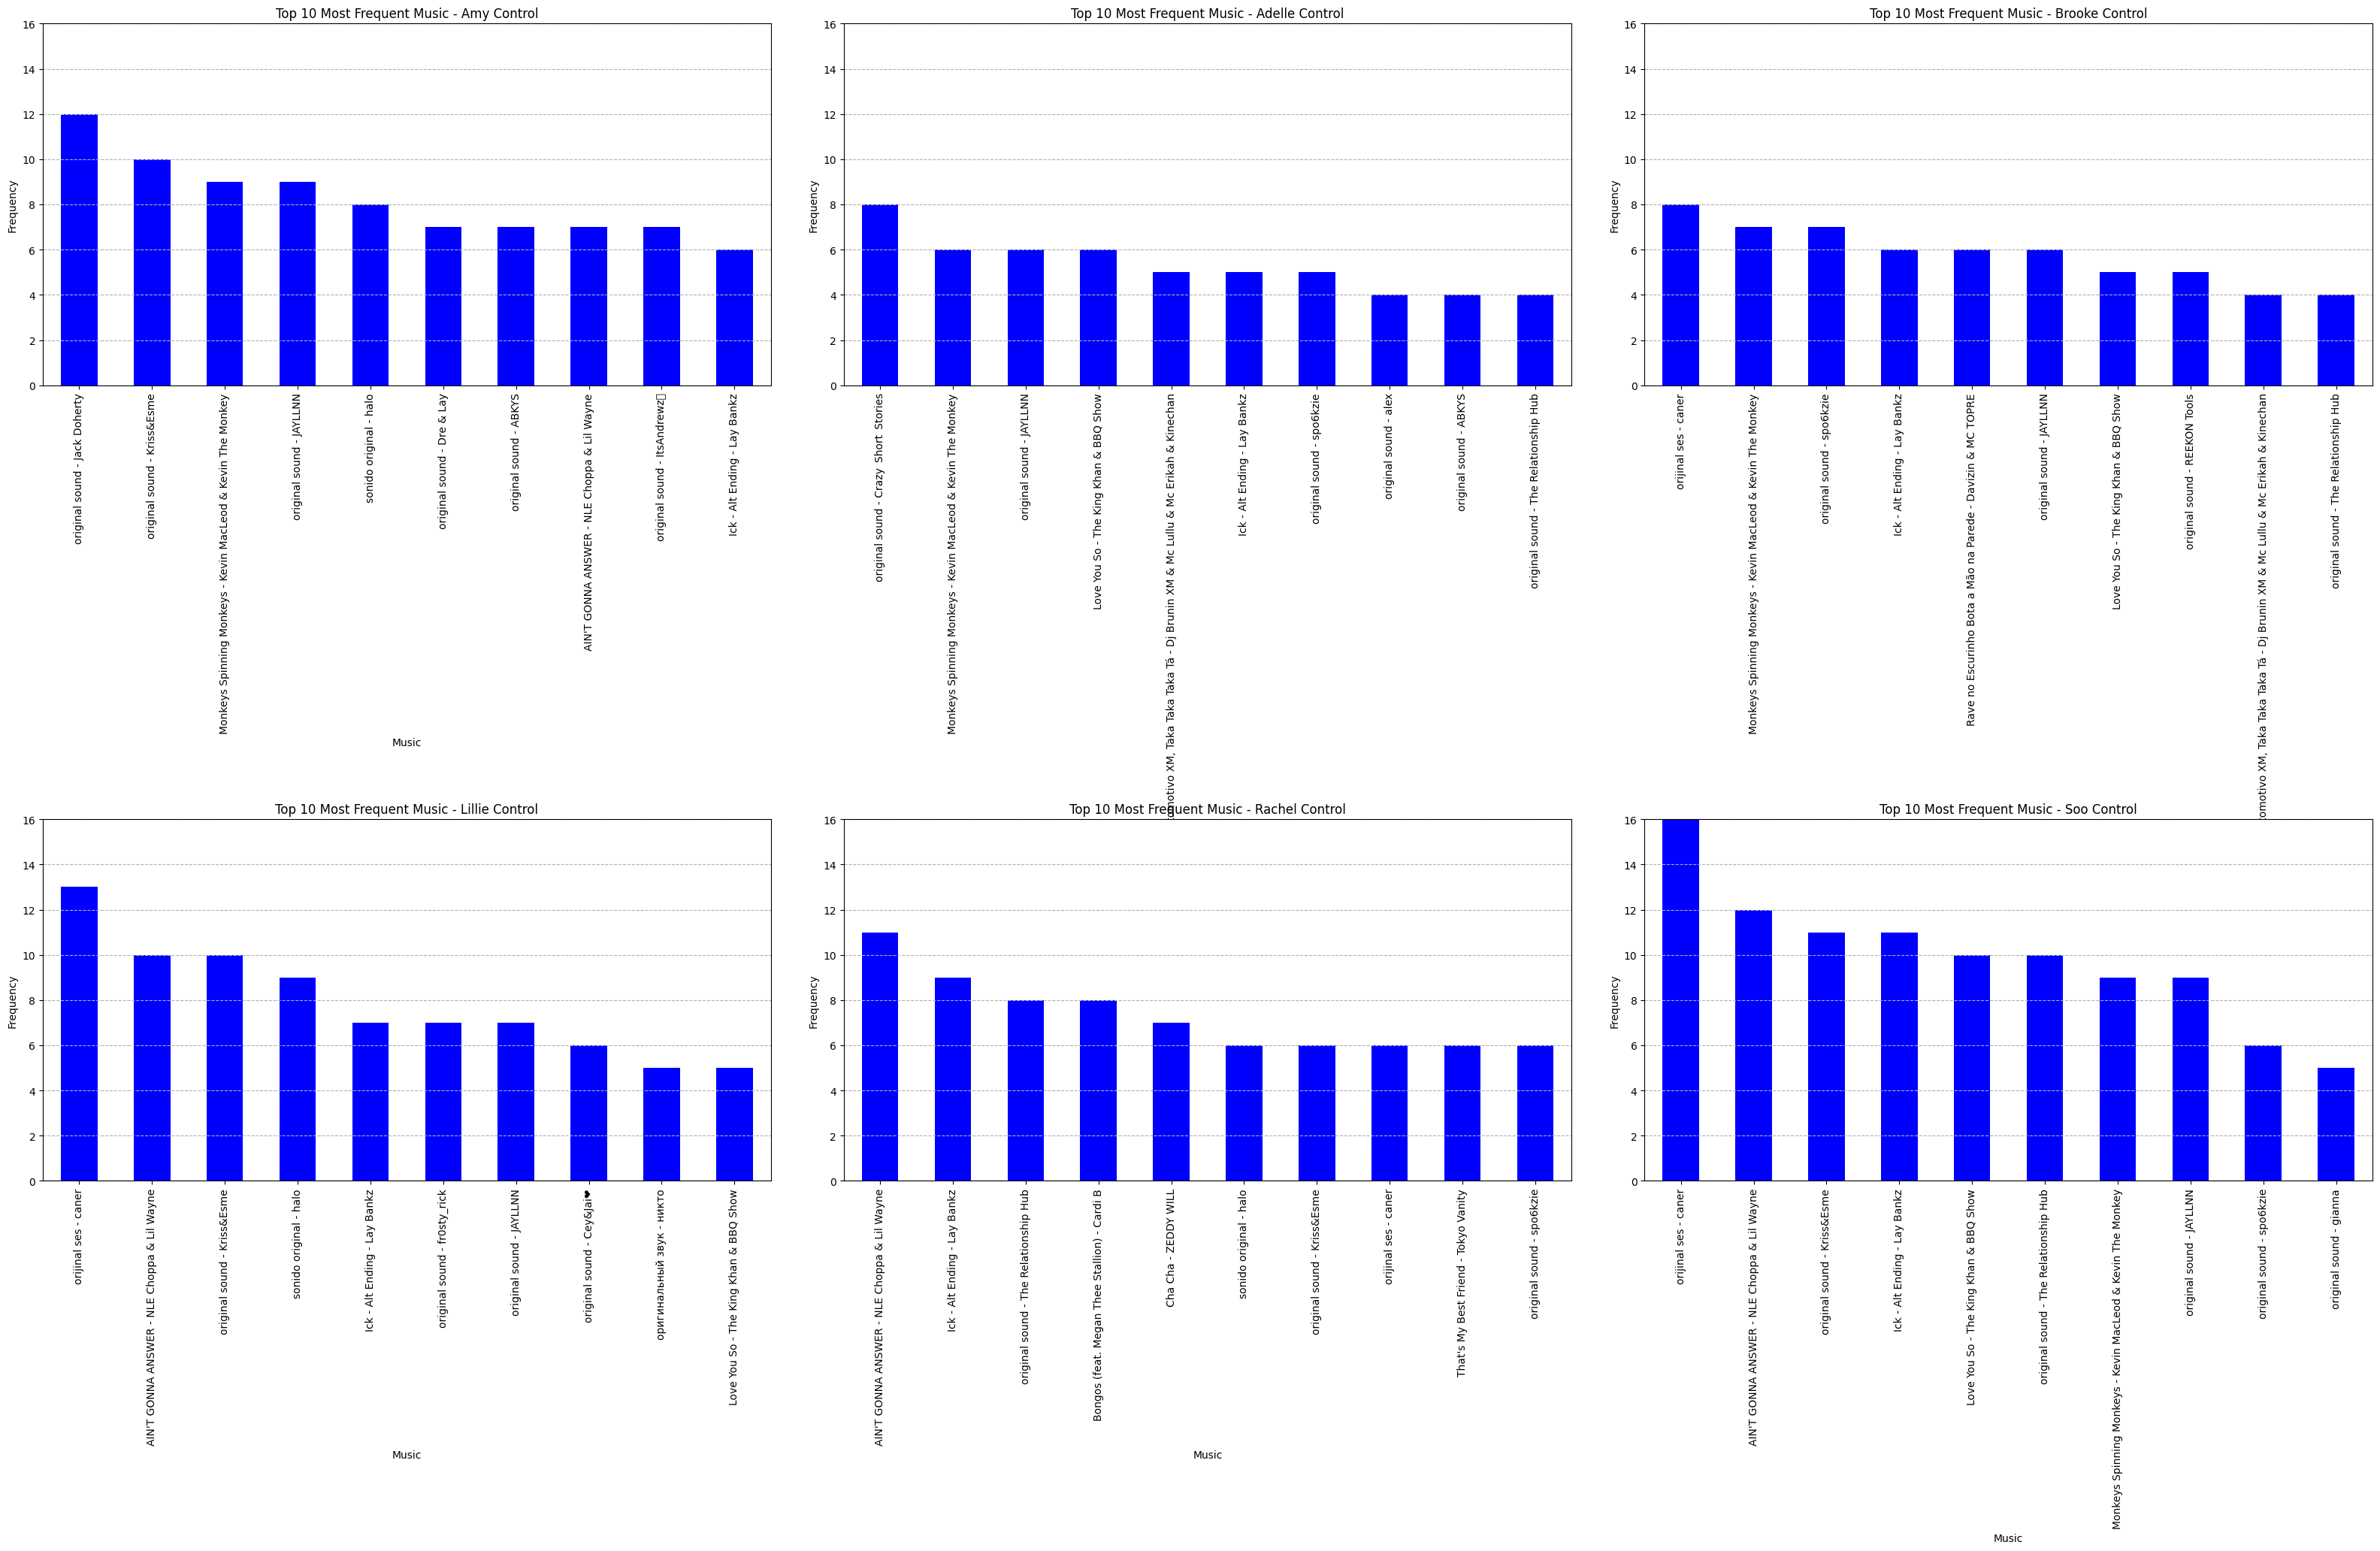

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top, ad_music_top, b_music_top, l_music_top, r_music_top, s_music_top],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - {title} Control')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 16)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()


In [ ]:
# 6 graphs for active data
# Amy music
amy_music_active = amy_active['music']
amy_music_active = amy_music_active[pd.notna(amy_music_active)]
amy_counts_active = amy_music_active.value_counts()
amy_music_top_active = amy_counts_active.head(10)

# Adelle music
ad_music_active = adelle_active['music']
ad_music_active = ad_music_active[pd.notna(ad_music_active)]
ad_counts_active = ad_music_active.value_counts()
ad_music_top_active = ad_counts_active.head(10)

# Brooke music
b_music_active = brooke_active['music']
b_music_active = b_music_active[pd.notna(b_music_active)]
b_counts_active = b_music_active.value_counts()
b_music_top_active = b_counts_active.head(10)

# Lillie music
l_music_active = lillie_active['music']
l_music_active = l_music_active[pd.notna(l_music_active)]
l_counts_active = l_music_active.value_counts()
l_music_top_active = l_counts_active.head(10)

# Rachel music
r_music_active = rachel_active['music']
r_music_active = r_music_active[pd.notna(r_music_active)]
r_counts_active = r_music_active.value_counts()
r_music_top_active = r_counts_active.head(10)

# Soo music
s_music_active = soo_active['music']
s_music_active = s_music_active[pd.notna(s_music_active)]
s_counts_active = s_music_active.value_counts()
s_music_top_active = s_counts_active.head(10)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120184 (\N{MATHEMATICAL BOLD FRAKTUR CAPITAL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120198 (\N{MATHEMATICAL BOLD FRAKTUR SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120215 (\N{MATHEMATICAL BOLD FRAKTUR SMALL R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120218 (\N{MATHEMATICAL BOLD FRAKTUR SMALL U}) missing from current font.
  

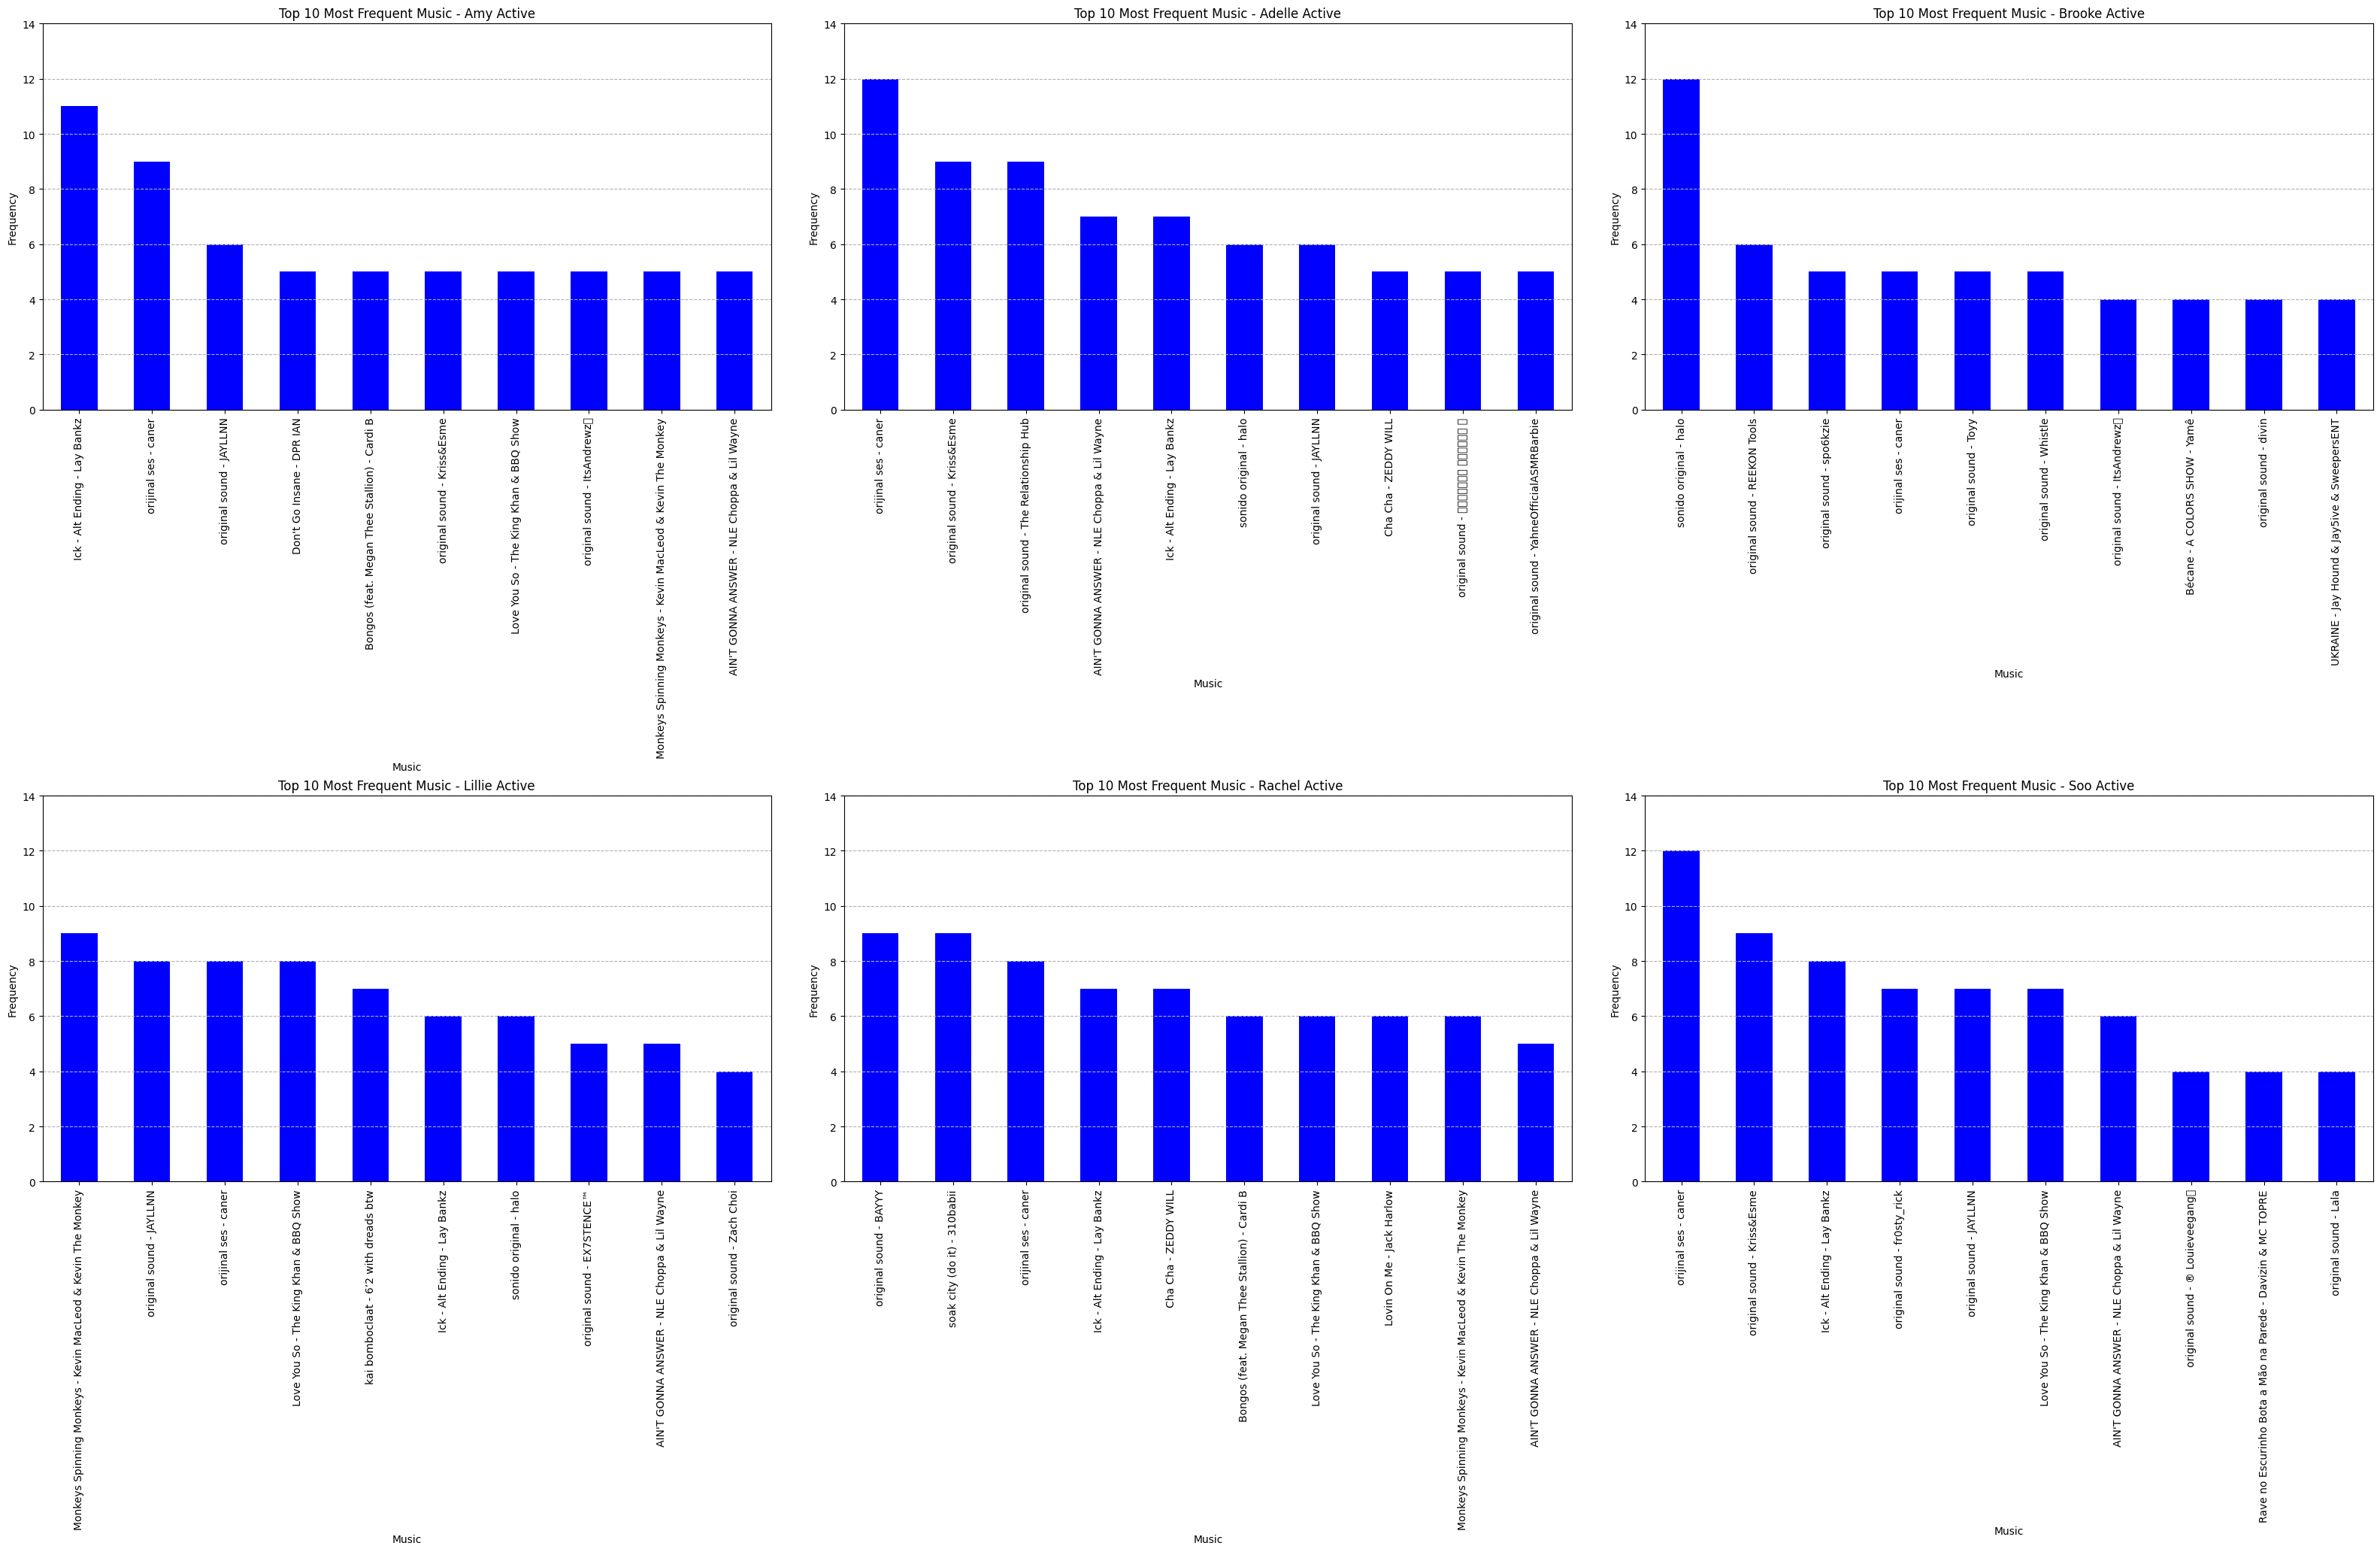

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top_active, ad_music_top_active, b_music_top_active, l_music_top_active, r_music_top_active, s_music_top_active],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - {title} Active')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 14)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1)
plt.show()

In [ ]:
# control combined top 10
combined_music = pd.concat([amy_music, ad_music, b_music, l_music, r_music, s_music])

# Remove missing values
combined_music = combined_music[pd.notna(combined_music)]

# Calculate the combined counts
combined_counts = combined_music.value_counts()

# Find the top 10 songs
top_10_songs_control = combined_counts.head(10)
top_10_songs_control

orijinal ses - caner                                           53
AIN'T GONNA ANSWER - NLE Choppa & Lil Wayne                    45
Ick - Alt Ending - Lay Bankz                                   44
original sound - JAYLLNN                                       39
original sound - Kriss&Esme                                    38
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey    37
Love You So - The King Khan & BBQ Show                         35
original sound - The Relationship Hub                          33
sonido original - halo                                         32
original sound - spo6kzie                                      29
Name: music, dtype: int64

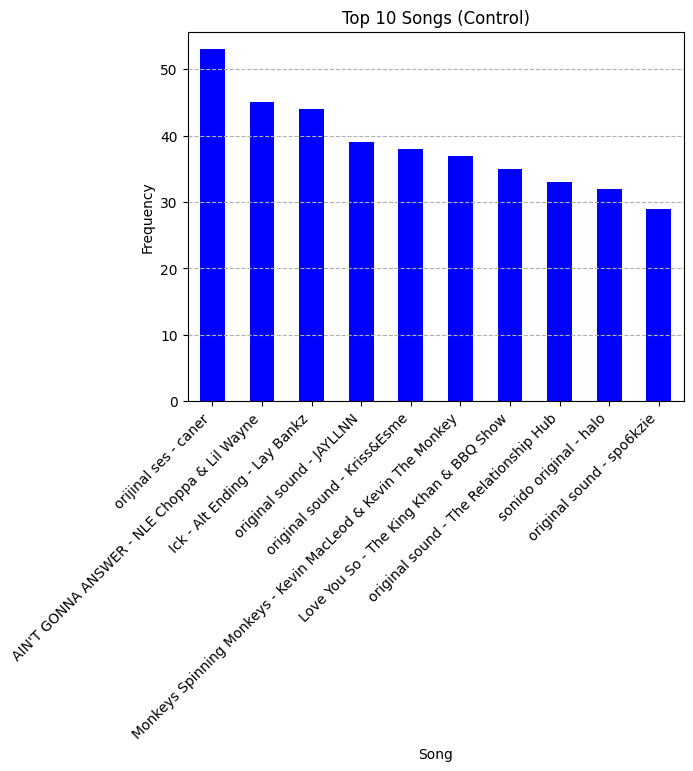

In [ ]:
# top 10 control graph

top_10_songs_control.plot(kind='bar', color='blue')
plt.title('Top 10 Songs (Control)')
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [ ]:
# active combined top 10
combined_music_active = pd.concat([amy_music_active, ad_music_active, b_music_active, l_music_active, r_music_active, s_music_active])

# Remove missing values
combined_music_active = combined_music_active[pd.notna(combined_music_active)]

# Calculate the combined counts
combined_counts_active = combined_music_active.value_counts()

# Find the top 10 songs
top_10_songs_active = combined_counts_active.head(10)
top_10_songs_active

orijinal ses - caner                                           54
Ick - Alt Ending - Lay Bankz                                   43
Love You So - The King Khan & BBQ Show                         34
sonido original - halo                                         32
original sound - Kriss&Esme                                    32
AIN'T GONNA ANSWER - NLE Choppa & Lil Wayne                    31
original sound - JAYLLNN                                       30
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey    24
original sound - EX7STENCE™                                    24
original sound - The Relationship Hub                          22
Name: music, dtype: int64

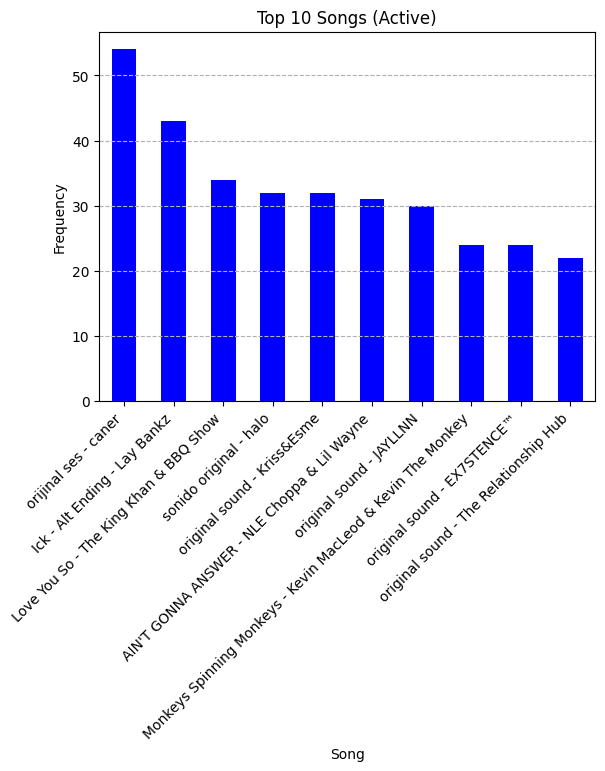

In [ ]:
# top 10 active graph

top_10_songs_active.plot(kind='bar', color='blue')
plt.title('Top 10 Songs (Active)')
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [ ]:
# total combined top 10
total_combined_music = pd.concat([combined_music, combined_music_active])

# Remove missing values
total_combined_music =total_combined_music[pd.notna(total_combined_music)]

# Calculate the combined counts
tot_combined_counts = total_combined_music.value_counts()

# Find the top 10 songs
top_10_songs_tot = tot_combined_counts.head(10)

top_10_songs_tot.plot(kind='bar', color='blue')
plt.title('Top 10 Songs (Total)')
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [ ]:
## END OF RACHEL TASKS

In [ ]:
##START OF LILLIE AND ADELLE TASKS##

In [ ]:
def makeActiveDF(col):
  s1 = amy_active[col].reset_index(drop=True)
  s2 = lillie_active[col].reset_index(drop=True)
  s3 = rachel_active[col].reset_index(drop=True)
  s4 = soo_active[col].reset_index(drop=True)
  s5 = adelle_active[col].reset_index(drop=True)
  s6 = brooke_active[col].reset_index(drop=True)

  return pd.concat([s1,s2,s3,s4,s5,s6],axis=1,ignore_index=True)

def makeControlDF(col):
  s1 = amy_control[col].reset_index(drop=True)
  s2 = lillie_control[col].reset_index(drop=True)
  s3 = rachel_control[col].reset_index(drop=True)
  s4 = soo_control[col].reset_index(drop=True)
  s5 = adelle_control[col].reset_index(drop=True)
  s6 = brooke_control[col].reset_index(drop=True)

  return pd.concat([s1,s2,s3,s4,s5,s6],axis=1,ignore_index=True)

def removeOutliers(df):
  q = df.quantile(0.99999999999999999999999999999999999999999999999999999999999)
  return df[(df<q)]

saves_active = removeOutliers(makeActiveDF('saves'))
comments_active = removeOutliers(makeActiveDF('comments'))
shares_active = removeOutliers(makeActiveDF('shares'))
likes_active = removeOutliers(makeActiveDF('likes'))

saves_active = saves_active.mean(axis=1)
comments_active = comments_active.mean(axis=1)
shares_active = shares_active.mean(axis=1)
likes_active = likes_active.mean(axis=1)


saves_control = removeOutliers(makeControlDF('saves'))
comments_control = removeOutliers(makeControlDF('comments'))
shares_control = removeOutliers(makeControlDF('shares'))
likes_control = removeOutliers(makeControlDF('likes'))

saves_control = saves_control.mean(axis=1)
comments_control = comments_control.mean(axis=1)
shares_control = shares_control.mean(axis=1)
likes_control = likes_control.mean(axis=1)


<Figure size 640x480 with 0 Axes>

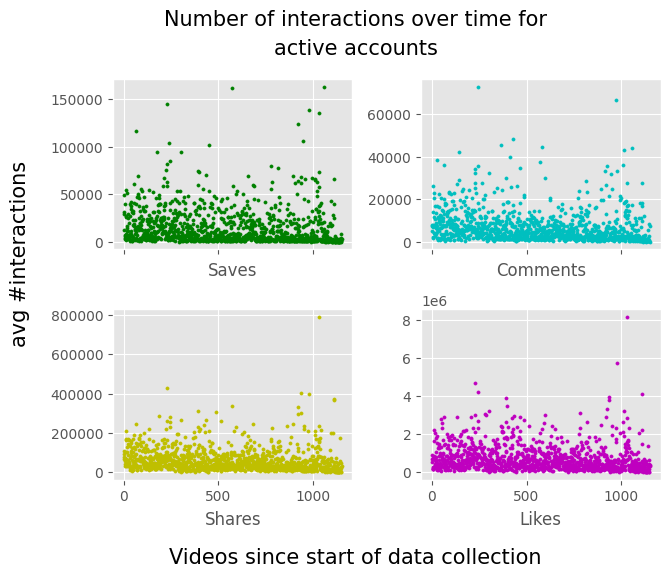

In [ ]:
factive = plt.figure()
factive, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

axes[0][0].scatter(saves_active.index, saves_active, color = "g",s=5)
axes[0][0].set_xlabel('Saves', labelpad = 5)

axes[0][1].scatter(comments_active.index, comments_active, color = "c",s=5)
axes[0][1].set_xlabel('Comments', labelpad = 5)

axes[1][0].scatter(shares_active.index, shares_active, color = "y",s=5)
axes[1][0].set_xlabel('Shares', labelpad = 5)

axes[1][1].scatter(likes_active.index, likes_active, color = "m",s=5)
axes[1][1].set_xlabel('Likes', labelpad = 5)

factive.tight_layout()
factive.text(0.5, 1.08, 'Number of interactions over time for',
              ha='center', size=15)
factive.text(0.5, 1.02, 'active accounts',
              ha='center', size=15)
factive.text(0.5, -0.04, 'Videos since start of data collection', ha='center',
              size=15)
factive.text(-0.04, 0.42, 'avg #interactions', size=15).set_rotation(90)

plt.show()

<Figure size 640x480 with 0 Axes>

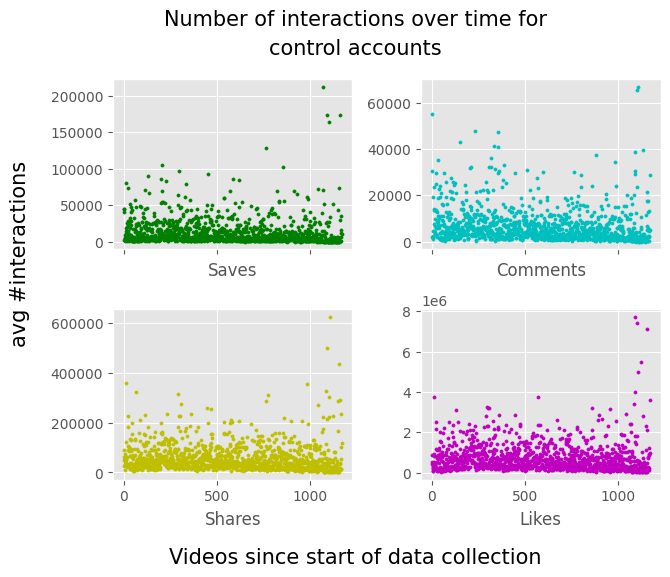

In [ ]:
fcontrol = plt.figure()
fcontrol, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

axes[0][0].scatter(saves_control.index, saves_control, color = "g",s=5)
axes[0][0].set_xlabel('Saves', labelpad = 5)
axes[0][1].scatter(comments_control.index, comments_control, color = "c",s=5)
axes[0][1].set_xlabel('Comments', labelpad = 5)

axes[1][0].scatter(shares_control.index, shares_control, color = "y",s=5)
axes[1][0].set_xlabel('Shares', labelpad = 5)

axes[1][1].scatter(likes_control.index, likes_control, color = "m",s=5)
axes[1][1].set_xlabel('Likes', labelpad = 5)

fcontrol.tight_layout()
fcontrol.text(0.5, 1.08, 'Number of interactions over time for',
              ha='center', size=15)
fcontrol.text(0.5, 1.02, 'control accounts',
              ha='center', size=15)
fcontrol.text(0.5, -0.04, 'Videos since start of data collection', ha='center',
              size=15)
fcontrol.text(-0.04, 0.42, 'avg #interactions', size=15).set_rotation(90)

plt.show()

<Figure size 640x480 with 0 Axes>

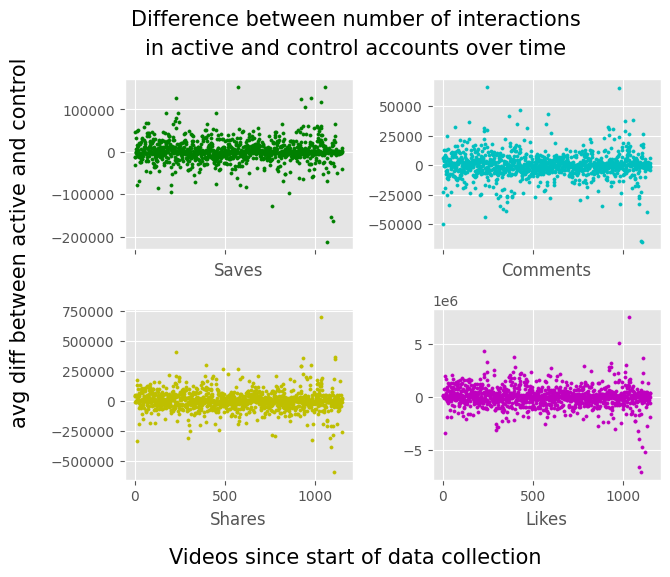

In [ ]:
saves_dif = saves_active-saves_control
comments_dif = comments_active-comments_control
shares_dif = shares_active-shares_control
likes_dif = likes_active-likes_control

fdif = plt.figure()
fdif, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

axes[0][0].scatter(saves_dif.index, saves_dif, color = "g",s=5)
axes[0][0].set_xlabel('Saves', labelpad = 5)

axes[0][1].scatter(comments_dif.index, comments_dif, color = "c",s=5)
axes[0][1].set_xlabel('Comments', labelpad = 5)

axes[1][0].scatter(shares_dif.index, shares_dif, color = "y",s=5)
axes[1][0].set_xlabel('Shares', labelpad = 5)

axes[1][1].scatter(likes_dif.index, likes_dif, color = "m",s=5)
axes[1][1].set_xlabel('Likes', labelpad = 5)

fdif.tight_layout()
fdif.text(0.5, 1.08, 'Difference between number of interactions',
              ha='center', size=15)
fdif.text(0.5, 1.02, 'in active and control accounts over time',
              ha='center', size=15)
fdif.text(0.5, -0.04, 'Videos since start of data collection', ha='center',
              size=15)
fdif.text(-0.04, 0.25, 'avg diff between active and control', size=15).set_rotation(90)

plt.show()

In [ ]:
##START OF BROOKE TASK

In [ ]:
def count_names(names_list): # Helper function, dictionary counting occurrences of each name
    name_counts = {}  #dictionary to store name counts counts

    for name in names_list:
      if pd.notna(name):
        if name in name_counts:   # If name is already in the dictionary increment count
          name_counts[name] += 1
        else:                     # If name is not in the dictionary add it with count 1
          name_counts[name] = 1

    return name_counts

In [ ]:
def dictToDataFrame(data):  #helper function, dictionary to dataframe
  dictionary = count_names(data.loc[:, 'author']) #calls helper to see occurences
  df = pd.DataFrame.from_dict(dictionary, orient='index', columns=['frequency']).reset_index() #makes dataframe dictionary
  df.columns = ['names', 'frequency']
  df = df.sort_values(by='frequency', ascending=False)
  df = df.reset_index(drop=True)
  return df

In [ ]:
# data
def makeGraph(data, member, actcont, bars, columns):
  dataframe = dictToDataFrame(data)
  names = dataframe.loc[:, 'names'][:bars]
  freq = dataframe.loc[:, 'frequency'][:columns] #come back

  # when plotting bars, the x-axis doesn't have numerical values, we need to generate them
  # this is why we use range(len(movies)) in the line below
  plt.bar(range(len(names)), freq, color = 'blue')
  plt.xlabel("Creators")
  plt.ylabel("Frequency")
  plt.title("Top 10 Most Frequent Creators - " + member + " " + actcont)

  # label x-axis with movie names by providing indices 0, 1, 2, etc. and labels for each tick
  plt.xticks(range(len(names)), names, rotation=45, ha='right')
  return plt
  plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

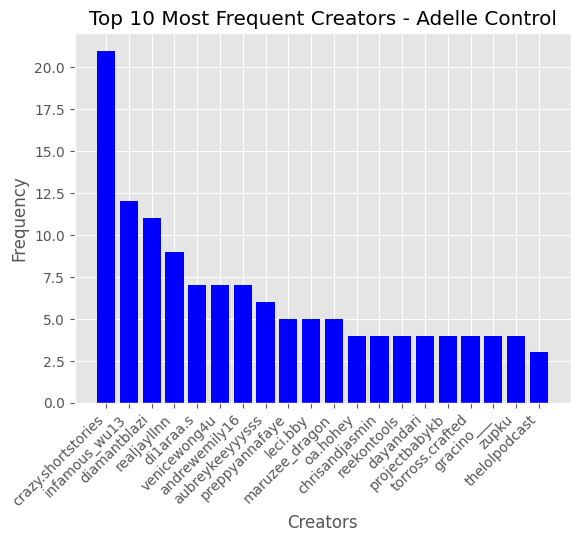

In [ ]:

makeGraph(amy_active, 'Amy', 'Active', num, num)
makeGraph(amy_control, 'Amy', 'Control', num, num)

makeGraph(brooke_active, 'Brooke', 'Active', num, num)
makeGraph(brooke_control, 'Brooke', 'Control', num, num)

makeGraph(adelle_active, 'Adelle', 'Active', num, num)
makeGraph(adelle_control, 'Adelle', 'Control', num, num)

#makeGraph(lillie_active, 'Lillie', 'Active', num, num)
#makeGraph(lillie_control, 'Lillie', 'Control', num, num)

#makeGraph(soo_active, 'Soo', 'Active', num, num,)
#makeGraph(soo_control, 'Soo', 'Control', num, num)

#makeGraph(rachel_active, 'Rachel', 'Active', num, num)
#makeGraph(rachel_control, 'Rachel', 'Control', num, num)

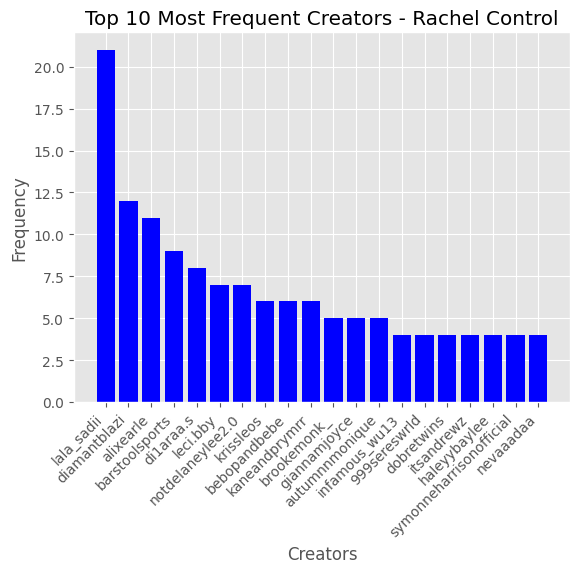

In [ ]:
num = 20
amya = makeGraph(amy_active, 'Amy', 'Active', num, num)
amyc = makeGraph(amy_control, 'Amy', 'Control', num, num)

brookea = makeGraph(brooke_active, 'Brooke', 'Active', num, num)
brookec = makeGraph(brooke_control, 'Brooke', 'Control', num, num)

adellea = makeGraph(adelle_active, 'Adelle', 'Active', num, num)
adellec = makeGraph(adelle_control, 'Adelle', 'Control', num, num)

lilliea = makeGraph(lillie_active, 'Lillie', 'Active', num, num)
lilliec = makeGraph(lillie_control, 'Lillie', 'Control', num, num)

sooa = makeGraph(soo_active, 'Soo', 'Active', num, num,)
sooc = makeGraph(soo_control, 'Soo', 'Control', num, num)

rachela = makeGraph(rachel_active, 'Rachel', 'Active', num, num)
rachelc = makeGraph(rachel_control, 'Rachel', 'Control', num, num)

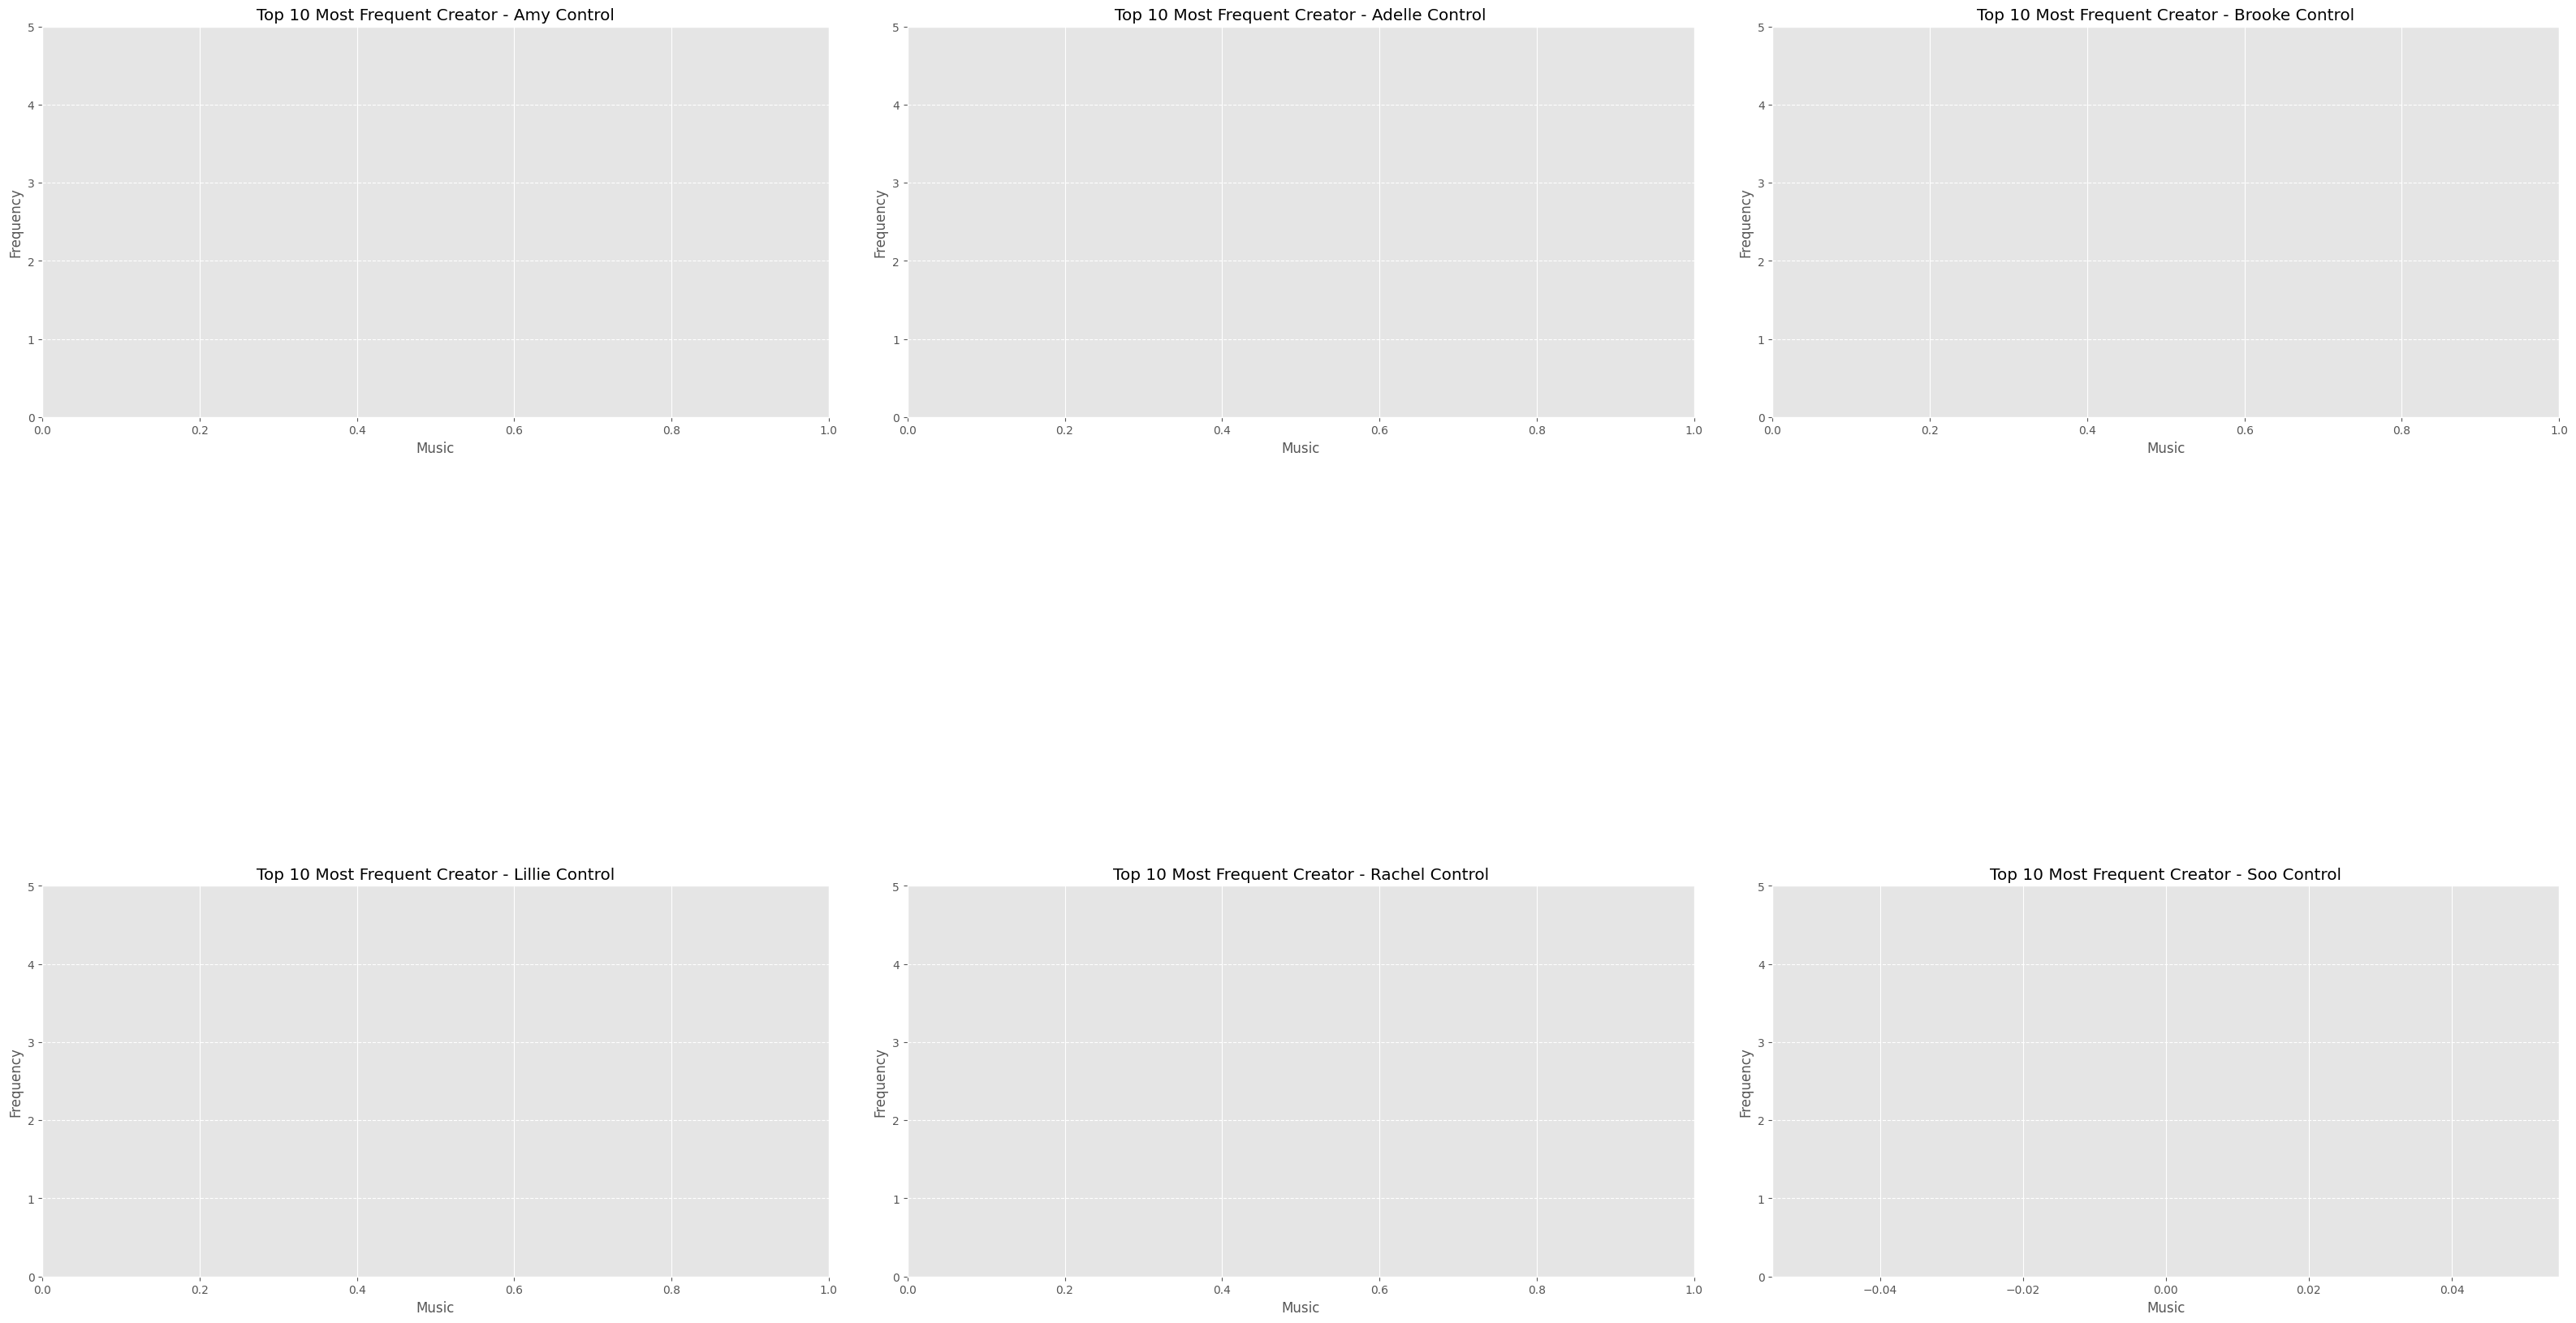

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amya, adellea, brookea, lilliea, rachela, sooa],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Creator - {title} Control')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 5)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()